# Customers and Products Analysis - Part 2: Querying SQLite from Python 

In part 1 of the project, I conducted queries of a sales records database for scale model cars using Using DB Browser (SQLite). Here as Part 2 of the project, I run SQLite queries from Python using sqlite3 and explored the results.

## Summary of results

 A list of priority products for restocking is given based on their potential revenue contribution and low-stock index. Lists of VIP customers and the least-enaged customers are obtained and we should consider group-targeted marketing and communication strategies. The new customer acquisition rate has dropped below 50% since 2004 and the average Life Time Value (LTV) is $\text{\$39039.59}$. We can spend up to $\text{\$13013.20}$ on acquiring each new customer to maintain a healty LTV-to-CAC ratio of 3:1. 

## Run queries with sqlite3 module

In [1]:
import sqlite3

In [2]:
# Connect to SQLite database 
conn = sqlite3.connect('stores.db')
cursor = conn.cursor()

# Open and read the .sql file containing the queries
with open('Customers_and_Products.sql', 'r') as file:
    sql_queries = file.read()

# Split the queries by semicolons to handle them individually
queries = sql_queries.split(';')

# Run each query and save results sequentially
results = []
for query in queries:
    query = query.strip()  # Strip leading/trailing whitespace
    if query:  # Only run non-empty queries
        print(f"Running query: {query}")
        cursor.execute(query)
        result = cursor.fetchall()  # Fetch the result of the query
        results.append(result)

conn.close()

# At this point, `results` contains the output of each query.


Running query: /*
Database contains eight tables:

Customers: customer data
Employees: all employee information
Offices: sales office information
Orders: customers' sales orders
OrderDetails: sales order line for each sales order
Payments: customers' payment records
Products: a list of scale model cars
ProductLines: a list of product line categories 

*/
-- Table descriptions
SELECT 'Customers' AS table_name, 
        (SELECT COUNT(*) FROM pragma_table_info('customers')) AS number_of_attributes,
        COUNT(*) AS number_of_row
  FROM customers
 
UNION ALL

SELECT 'Products' AS table_name, 
        (SELECT COUNT(*) FROM pragma_table_info('products')) AS number_of_attributes,
        COUNT(*) AS number_of_row
  FROM products
  
UNION ALL

SELECT 'Productlines' AS table_name, 
        (SELECT COUNT(*) FROM pragma_table_info('productlines')) AS number_of_attributes,
        COUNT(*) AS number_of_row
  FROM productlines
  
UNION ALL

SELECT 'Orders' AS table_name, 
        (SELECT COUNT(*

## Display and explore the results from queries

In [3]:
print(type(results))
print(len(results))

<class 'list'>
8


In [4]:
# first query returns table descriptions of the databse
table_descriptions=results[0]
table_descriptions  # table_name, number of collumns, number of rows

[('Customers', 13, 122),
 ('Products', 9, 110),
 ('Productlines', 4, 7),
 ('Orders', 7, 326),
 ('OrderDetails', 5, 2996),
 ('Payments', 4, 273),
 ('Employees', 8, 23),
 ('Offices', 9, 7)]

### Priority products for restocking
WITH low_stock_products AS (
To answer the question that *Which Products Should We Order More of or Less of*, we need to find out which products have a low stock (i.e., high demand), which products have a high performance (i.e. high revenue). 

**low stock index=sum(QuantityOrdered)/quantityInStock** <br>
**product performance index=sum(QuantityOrdered*priceEach)**

If **low stock index >1**, it indicates that there are more orders than stock for the product, hence we should Replenish Stock As Soon As Possible.<br>

In [5]:
# the second query returns the low stock index for top 20 low stock products
low_stock_prodcts=results[1]
low_stock_prodcts # product code, product name, product line, low stock index

[('S24_2000', '1960 BSA Gold Star DBD34', 'Motorcycles', 67.67),
 ('S12_1099', '1968 Ford Mustang', 'Classic Cars', 13.72),
 ('S32_4289', '1928 Ford Phaeton Deluxe', 'Vintage Cars', 7.15),
 ('S32_1374', '1997 BMW F650 ST', 'Motorcycles', 5.7),
 ('S72_3212', 'Pont Yacht', 'Ships', 2.31),
 ('S700_3167', 'F/A 18 Hornet 1/72', 'Planes', 1.9),
 ('S50_4713', '2002 Yamaha YZR M1', 'Motorcycles', 1.65),
 ('S18_2795', '1928 Mercedes-Benz SSK', 'Vintage Cars', 1.61),
 ('S18_2248', '1911 Ford Town Car', 'Vintage Cars', 1.54),
 ('S700_1938', 'The Mayflower', 'Ships', 1.22),
 ('S32_3522',
  '1996 Peterbilt 379 Stake Bed with Outrigger',
  'Trucks and Buses',
  1.21),
 ('S50_1392', 'Diamond T620 Semi-Skirted Tanker', 'Trucks and Buses', 0.96),
 ('S18_2581', 'P-51-D Mustang', 'Planes', 0.92),
 ('S12_3891', '1969 Ford Falcon', 'Classic Cars', 0.92),
 ('S18_4721', '1957 Corvette Convertible', 'Classic Cars', 0.81),
 ('S24_1046', '1970 Chevy Chevelle SS 454', 'Classic Cars', 0.8),
 ('S12_1666', '1958 Se

* The results shows there are 11 products with higher than 1 low stock index

In [6]:
# the third query return the product performance index
top_10_Products=results[2]
top_10_Products # product code, product name, product performance index

[('S18_3232', '1992 Ferrari 360 Spider red', 276839.98),
 ('S12_1108', '2001 Ferrari Enzo', 190755.86000000002),
 ('S10_1949', '1952 Alpine Renault 1300', 190017.96),
 ('S10_4698', '2003 Harley-Davidson Eagle Drag Bike', 170686.0),
 ('S12_1099', '1968 Ford Mustang', 161531.48),
 ('S12_3891', '1969 Ford Falcon', 152543.02),
 ('S18_1662', '1980s Black Hawk Helicopter', 144959.91),
 ('S18_2238', '1998 Chrysler Plymouth Prowler', 142530.63),
 ('S18_1749', '1917 Grand Touring Sedan', 140535.6),
 ('S12_2823', '2002 Suzuki XREO', 135767.03)]

In [7]:
# The fourth query return the products with higher than 1 low stock index and ordered by product performance index
priority_products_for_restocking=results[3]
priority_products_for_restocking # productCode,productName, product line, low stock index, product performance index

[('S12_1099', '1968 Ford Mustang', 'Classic Cars', 13.72, 161531.48),
 ('S18_2795', '1928 Mercedes-Benz SSK', 'Vintage Cars', 1.61, 132275.98),
 ('S32_1374', '1997 BMW F650 ST', 'Motorcycles', 5.7, 89364.89),
 ('S700_3167', 'F/A 18 Hornet 1/72', 'Planes', 1.9, 76618.4),
 ('S50_4713', '2002 Yamaha YZR M1', 'Motorcycles', 1.65, 73670.64),
 ('S700_1938', 'The Mayflower', 'Ships', 1.22, 69531.61),
 ('S24_2000', '1960 BSA Gold Star DBD34', 'Motorcycles', 67.67, 67193.49),
 ('S32_4289', '1928 Ford Phaeton Deluxe', 'Vintage Cars', 7.15, 60493.33),
 ('S32_3522',
  '1996 Peterbilt 379 Stake Bed with Outrigger',
  'Trucks and Buses',
  1.21,
  57282.49),
 ('S72_3212', 'Pont Yacht', 'Ships', 2.31, 47550.4),
 ('S18_2248', '1911 Ford Town Car', 'Vintage Cars', 1.54, 45306.77)]

* The results prioritize products for restocking based on their potential revenue contribution.
* Among low stock products, '1968 Ford Mustang' has the highest projected revenue and a low stock index of 13.72, indicating strong demand relative to available stock.
* '1960 BSA Gold Star DBD34' is the product with the highest low stock index (67.67). It means the quanity ordered is about 68 times of the quantity in stock, highlighting a significant stock gap. However, its potential revenue is comparatively modest(<1000,000).

### Marketing and Communication Strategies for Customer Segments

In [9]:
# The fifth query returns the top 5 VIP customers from whom we have the most profit
top_5_VIP_customers=results[4]
top_5_VIP_customers  # LastName, FirstName, city, country, profit_per_customer

[('Freyre', 'Diego ', 'Madrid', 'Spain', 326519.66),
 ('Nelson', 'Susan', 'San Rafael', 'USA', 236769.39),
 ('Young', 'Jeff', 'NYC', 'USA', 72370.09),
 ('Ferguson', 'Peter', 'Melbourne', 'Australia', 70311.07),
 ('Labrune', 'Janine ', 'Nantes', 'France', 60875.3)]

In [10]:
# Below show a method that uses pandas to interact with the database
import pandas as pd
conn = sqlite3.connect('stores.db')

query='''
WITH profit_per_customer AS (
SELECT o.customerNumber, sum(od.quantityOrdered*(od.priceEach-p.buyPrice))AS profit_per_customer
  FROM orders o
  JOIN orderdetails od
    ON o.orderNumber=od.orderNumber
  JOIN products p
    ON od.productCode=p.productCode
 GROUP BY o.customerNumber
 ORDER BY profit_per_customer DESC
)

SELECT c.contactLastName, c.contactFirstName, c.city, c.country,ppc.profit_per_customer
  FROM customers c
  JOIN profit_per_customer ppc
    ON c.customerNumber=ppc.customerNumber
 ORDER BY ppc.profit_per_customer DESC
 LIMIT 5;
 '''
top_5_VIP_customers = pd.read_sql_query(query,conn)
conn.close()
top_5_VIP_customers 

,contactLastName,contactFirstName,city,country,profit_per_customer
0,Freyre,Diego,Madrid,Spain,326519.66
1,Nelson,Susan,San Rafael,USA,236769.39
2,Young,Jeff,NYC,USA,72370.09
3,Ferguson,Peter,Melbourne,Australia,70311.07
4,Labrune,Janine,Nantes,France,60875.30


For the VIP customers, we can use effective strategies to engage and retain VIPs, considering:
* Exclusive Rewards & Loyalty Programs: Use rewards like early product access, exclusive discounts, early access to sales, VIP-Only Events.
* Personalized Communication: Use data (purchase history, preferences) to personalize Product recommendations, birthday or anniversary gifts, custom emails with the VIP’s name and curated offers.
* Priority Service & Support: Provide Priority shipping or handling, 24/7 dedicated support line, hassle-free returns or adjustments
* Feedback & Influence: Involve VIPs in product development feedback, beta testing new services, “Inner circle” panels for brand direction

In [20]:
# The sixtth query returns the 5 leasted enaged customers from whom we have the lowest profit
least_5_engaged_customers=results[5]
least_5_engaged_customers ## LastName, FirstName, city, country,profit_per_customer

[('Young', 'Mary', 'Glendale', 'USA', 2610.870000000001),
 ('Taylor', 'Leslie', 'Brickhaven', 'USA', 6586.0199999999995),
 ('Ricotti', 'Franco', 'Milan', 'Italy', 9532.93),
 ('Schmitt', 'Carine ', 'Nantes', 'France', 10063.800000000001),
 ('Smith', 'Thomas ', 'London', 'UK', 10868.04)]

For least-engaged customers, our goal is to rekindle interest, rebuild relevance, and reactivate them before they churn completely. Here are key strategies:
* Re-Engagement Campaigns: Send targeted email campaigns with special offers or discounts to encourage them to make another purchase.
* Survey to Understand Disengagement: Ask why they stopped engaging (simple, 1-click surveys), Offer reward for feedback
* A/B Test New Engagement Formats: Try different formats or platforms, for example, Email vs SMS, Short videos or interactive content, App push notifications if applicable
*  Know When to Let Go: After multiple attempts with no engagement, suppress them from frequent campaigns. Move to a low-touch, occasional newsletter list.

### How much can we spend on acquiring new customers
1. Calculate the Customer Lifetime Value (LTV) -- the average of customer profits
2. Check the number of new customers arriving each month

In [23]:
# Customer lifetime value
average_customer_profit=results[6]
average_customer_profit

[(39039.59,)]

In [13]:
# The number of new customers arriving each month
new_customer_per_month=results[7]
new_customer_per_month # year_month, new_customers_percentage, new_customers_total_payment_percentage

[(200301, 100.0, 100.0),
 (200302, 100.0, 100.0),
 (200303, 100.0, 100.0),
 (200304, 100.0, 100.0),
 (200305, 83.0, 100.0),
 (200306, 100.0, 100.0),
 (200307, 75.0, 68.3),
 (200308, 66.0, 54.2),
 (200309, 80.0, 95.9),
 (200310, 69.0, 69.3),
 (200311, 52.0, 53.9),
 (200312, 60.0, 54.9),
 (200401, 33.0, 41.1),
 (200402, 33.0, 26.5),
 (200403, 54.0, 55.0),
 (200404, 40.0, 40.3),
 (200405, 12.0, 17.3),
 (200406, 33.0, 43.9),
 (200407, 10.0, 6.5),
 (200408, 18.0, 26.2),
 (200409, 33.0, 56.4)]

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.DataFrame(new_customer_per_month)
df.columns=['year_month','new_customers_percentage','new_customers_payment_percentage']
df.head()

,year_month,new_customers_percentage,new_customers_payment_percentage
0,200301,100.0,100.0
1,200302,100.0,100.0
2,200303,100.0,100.0
3,200304,100.0,100.0
4,200305,83.0,100.0


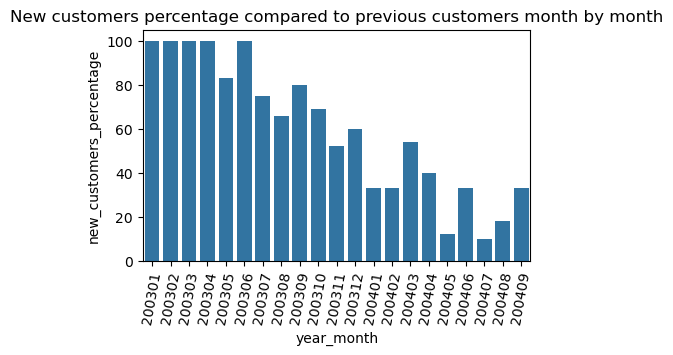

In [22]:
plt.figure(figsize=(5,3))
sns.barplot(data=df,
            x='year_month',
            y='new_customers_percentage',
            )
plt.xticks(rotation=80)
plt.title('New customers percentage compared to previous customers month by month');

* The new customer acquisition rate has dropped below 50% since 2004. The year 2005, which is present in the database as well, isn't present in the query result, this means that the store has not had any new customers since September of 2004. This means it makes sense to spend money acquiring new customers
* Given the Lifetime Value (LTV) of a customer, we can calculate how much can be spent on acquiring new customers (i.e, Customer Acquisition Cost, CAC) by considering several factors, including desired profitability, marketing budget, and company growth goals.
*  Customer Acquisition Cost includs all expenses related to sales, marketing, advertising, promotions, salaries, software, and overheads associated with attracting and converting leads into paying customers.<br> **Max Allowable CAC=LTV/target LTV to CAC ratio**
*  A healthy LTV-to-CAC ratio is usually 3:1. If retention is strong and cash flow is stable, some businesses might tolerate a 2:1 ratio or even 1:1 in high growth phases. <br>
With our LTV of 39039.59, if we keep our target LTV-to-CAC ratio=3:1, then CAC=13013.20; if our target LTV-to-CAC ratio=2:1, then CAC=19519.80


# Conculsion
 In this work, I run SQLite queries from Python to explore a sales records database for scale model cars. 
 
 The results reveal the priority products for restocking based on their potential revenue contribution. Among low stock products, '1968 Ford Mustang' has the highest projected revenue and a low stock index of 13.72, indicating strong demand relative to available stock. '1960 BSA Gold Star DBD34' is the product with the highest low stock index (67.67), highlighting a significant stock gap. However, its potential revenue is comparatively modest(<1000,000). 
 
 The results hightlights VIP customers and the least-enaged customers and we should consider marketing and communication Strategies targeted for the two different group customers.
 
 Lastly, the results show that the new customer acquisition rate has dropped below 50% since 2004. Given a LTV of 39039.59, recommendations on how much can be spent on acquiring new customers are given. We can spend up to $ 13013.20 on acquiring each new customer to maintain a healty LTV-to-CAC ratio of 3:1. 
 